In [55]:
import numpy as np
from utils import *
from scipy import ndimage
import os

from skimage.transform import resize

In [59]:
class Image:
    
    def __init__(self, name, imArr):
        self.name = name
        self.imArr = imArr
        self.height, self.width = imArr.shape[:2]

    def fromPath(pathName):
        imArr, imName = readImageNName(pathName)
        if imArr.ndim == 2:
            h, w = imArr.shape
            newIm = np.empty((h, w, 3))
            newIm[:, :, 0] = imArr
            newIm[:, :, 1] = imArr
            newIm[:, :, 2] = imArr
            imArr = newIm
        resizeFactor = 0.25
        imArr = resize(imArr, (imArr.shape[0] * resizeFactor, imArr.shape[1] * resizeFactor))
        result = Image(imName, imArr)
        return result
    

In [60]:
def getAllImsInDir(directory, gridSize = None):
    fileNames = os.listdir(directory)
    
    if gridSize == None:
        gridSize = len(fileNames)
    
    result = []
    
    for fileName in fileNames:
        filePath = "%s/%s" % (directory, fileName)
        result.append(Image.fromPath(filePath))
    return np.array(result)

def ims2Grid(results, gridSize):
    assert len(results) == gridSize ** 2
    grid = []
    
    i = 0
    
    for row in range(gridSize):
        currRow = []
        grid.append(currRow)
        for col in range(gridSize):
            currRow.append(results[i])
            i += 1
    
    return grid

# bulldozerImgs = getAllImsInDir("../lego_bulldozer-rectified")

In [61]:
chessImgs = getAllImsInDir("../chess-rectified")

/Users/reginaongowarsito/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [62]:
chessImgs[0].imArr

array([[[0.28039216, 0.28823529, 0.2627451 ],
        [0.28627451, 0.29901961, 0.27941176],
        [0.29411765, 0.31078431, 0.28921569],
        ...,
        [0.60686275, 0.60882353, 0.61764706],
        [0.59313725, 0.59901961, 0.59705882],
        [0.59705882, 0.59705882, 0.60392157]],

       [[0.28333333, 0.29117647, 0.28235294],
        [0.2872549 , 0.30490196, 0.28235294],
        [0.30980392, 0.31764706, 0.29705882],
        ...,
        [0.60980392, 0.61176471, 0.61568627],
        [0.60490196, 0.60882353, 0.62156863],
        [0.61568627, 0.61666667, 0.6245098 ]],

       [[0.29509804, 0.29901961, 0.29901961],
        [0.30882353, 0.31176471, 0.28137255],
        [0.32156863, 0.3254902 , 0.30490196],
        ...,
        [0.61960784, 0.62745098, 0.62352941],
        [0.61470588, 0.62254902, 0.61666667],
        [0.62058824, 0.62058824, 0.62843137]],

       ...,

       [[0.66470588, 0.66078431, 0.68431373],
        [0.67352941, 0.66176471, 0.69509804],
        [0.67745098, 0

In [63]:
chessImgsGrid = ims2Grid(chessImgs, 17)
chessImgsGrid

[[<__main__.Image at 0xffe9938d0>,

In [80]:
y = 1
x = 2

def easyShift(array, y, x):
    return ndimage.shift(array, ((y, x, 0)), mode="constant", order=0, cval=0)

In [123]:
gridSize = 17

spacer = 0.35

results = []

for rowI in range(gridSize):
    rowICent = -1 * (rowI - (gridSize // 2))
    row = chessImgsGrid[rowI]
    for colI in range(gridSize):
        img = row[colI]
        colICent = colI - (gridSize // 2)
        print(img.name, rowICent, colICent)
        results.append(easyShift(img.imArr, spacer * rowICent, spacer * colICent))
        

out_00_00_-780134705_-3355331299_ 8 -8
out_00_01_-779655273_-3351244873_ 8 -7
out_00_02_-779370178_-3346097900_ 8 -6
out_00_03_-779797058_-3340727539_ 8 -5
out_00_04_-779465576_-3335998291_ 8 -4
out_00_05_-779655518_-3330550537_ 8 -3
out_00_06_-779328857_-3325257324_ 8 -2
out_00_07_-779598511_-3320361328_ 8 -1
out_00_08_-779367920_-3315136719_ 8 0
out_00_09_-779593018_-3309861816_ 8 1
out_00_10_-779422363_-3304526611_ 8 2
out_00_11_-779190735_-3299280029_ 8 3
out_00_12_-779295410_-3294000977_ 8 4
out_00_13_-779193420_-3288597412_ 8 5
out_00_14_-778947571_-3283084229_ 8 6
out_00_15_-779205078_-3277917480_ 8 7
out_00_16_-779041199_-3272818848_ 8 8
out_01_00_-783836304_-3354860352_ 7 -8
out_01_01_-783681396_-3351084717_ 7 -7
out_01_02_-784052490_-3346326660_ 7 -6
out_01_03_-783646240_-3340469482_ 7 -5
out_01_04_-783880005_-3336093018_ 7 -4
out_01_05_-783562622_-3329854736_ 7 -3
out_01_06_-783852905_-3324881348_ 7 -2
out_01_07_-783818787_-3319486084_ 7 -1
out_01_08_-783792969_-3314520996_ 

out_13_04_-843058655_-3335315674_ -5 -4
out_13_05_-843102356_-3329750244_ -5 -3
out_13_06_-842759460_-3324461670_ -5 -2
out_13_07_-843262268_-3319128174_ -5 -1
out_13_08_-843351746_-3314310791_ -5 0
out_13_09_-843379150_-3308906494_ -5 1
out_13_10_-843240295_-3303043945_ -5 2
out_13_11_-843142639_-3297943115_ -5 3
out_13_12_-843019592_-3292743408_ -5 4
out_13_13_-843194275_-3287811035_ -5 5
out_13_14_-842764282_-3281936523_ -5 6
out_13_15_-843342346_-3276950684_ -5 7
out_13_16_-842875488_-3271607910_ -5 8
out_14_00_-848599976_-3354689453_ -6 -8
out_14_01_-848877441_-3350853516_ -6 -7
out_14_02_-848086182_-3345431641_ -6 -6
out_14_03_-848421265_-3340415771_ -6 -5
out_14_04_-848521423_-3335583740_ -6 -4
out_14_05_-848337708_-3330151611_ -6 -3
out_14_06_-848055420_-3324578369_ -6 -2
out_14_07_-848593933_-3319533447_ -6 -1
out_14_08_-848415833_-3314078857_ -6 0
out_14_09_-847899292_-3309187256_ -6 1
out_14_10_-848283203_-3303543213_ -6 2
out_14_11_-848257080_-3298533691_ -6 3
out_14_12_-84

In [124]:
finalImgImArr = np.zeros(chessImgs[0].imArr.shape)

for img in results:
    finalImgImArr += img

finalImgImArr /= len(results)


/Users/reginaongowarsito/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/reginaongowarsito/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/Users/reginaongowarsito/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1428: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


File saved to: output_imgs/20181028213443_test.png


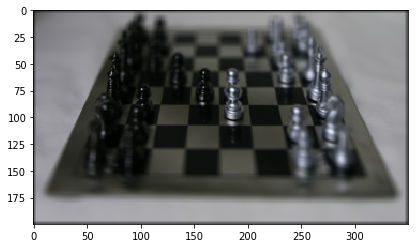

In [125]:
printImage("test.png", finalImgImArr, disp=True)

In [8]:
printImage("lego_bulldozer-no_shift.png", finalImgImArr)

/Users/reginaongowarsito/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


File saved to: output_imgs/20181024222002_lego_bulldozer-no_shift.png


In [13]:
gridSize = 17
unitOffsets = list(np.arange(-(gridSize // 2), (gridSize // 2) + 1))

In [ ]:
shiftedFinalImgArr = np.zeros(bulldozerImgs[0].imArr.shape)

for i in range(len(bulldozerImgs)):
    img = bulldozerImgs[i]
    shiftedFinalImgArr += img.imArr

shiftedFinalImgArr /= len(bulldozerImgs)
